In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#importing necessary libraries
import scipy.stats as stats
import pylab

In [3]:
food_covid_df=pd.read_csv('food_covid_cleaned.csv')

/tmp/ipykernel_915514/3826051243.py:1: DtypeWarning: Columns (9,13,15,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  food_covid_df=pd.read_csv('food_covid_cleaned.csv')


In [8]:
food_covid_df.head()

,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,Age,Sex_At_Birth,Race,Education,Marital_Status,Children_Present,...,Active_Duty,House_Receives_SNAP,Used_To_Meet_Needs,Provider_Of_Free_Groceries,Freq_Feel_Depressed,Freq_Feel_Anxious,Year,week_name,Week,New Covid Cases
0,121151.0,88797.0,2389.0,0.0,18 - 24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
1,493462.0,413244.0,164615.0,46441.0,25 - 39,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
2,501828.0,282464.0,93254.0,36167.0,40 - 54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
3,484964.0,179435.0,36182.0,2111.0,55 - 64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
4,544074.0,190534.0,2312.0,0.0,65 and above,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0


In [11]:
food_covid_df.columns

Index(['Enough of the kinds of food wanted',
       'Enough Food, but not always the kinds wanted',
       'Sometimes not enough to eat', 'Often not enough to eat', 'Age',
       'Sex_At_Birth', 'Race', 'Education', 'Marital_Status',
       'Children_Present', 'Unemployed_Last_4', 'Employed_Last_7',
       'Reason_Not_Working', 'Receiving_Pay_No_Work', 'Income',
       'Health_Status', 'Covered_By_Insurance', 'Caught_Up_On_Mortgage',
       'Location', 'Household_Size', 'Active_Duty', 'House_Receives_SNAP',
       'Used_To_Meet_Needs', 'Provider_Of_Free_Groceries',
       'Freq_Feel_Depressed', 'Freq_Feel_Anxious', 'Year', 'week_name', 'Week',
       'New Covid Cases'],
      dtype='object')

In [12]:
food_covid_df['Location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
food_covid_df.isna().sum()

Enough of the kinds of food wanted                   0
Enough Food, but not always the kinds wanted         0
Sometimes not enough to eat                          0
Often not enough to eat                              0
Age                                             169513
Sex_At_Birth                                    175087
Race                                            172319
Education                                       173245
Marital_Status                                  172323
Children_Present                                175497
Unemployed_Last_4                               174167
Employed_Last_7                                 174167
Reason_Not_Working                              156889
Receiving_Pay_No_Work                           172853
Income                                          168635
Health_Status                                   172037
Covered_By_Insurance                            173249
Caught_Up_On_Mortgage                           172633
Location  

In [14]:
food_covid_df['Year'].value_counts()

2020    127830
2021     49103
Name: Year, dtype: int64

In [15]:
food_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176933 entries, 0 to 176932
Data columns (total 30 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Enough of the kinds of food wanted            176933 non-null  float64
 1   Enough Food, but not always the kinds wanted  176933 non-null  float64
 2   Sometimes not enough to eat                   176933 non-null  float64
 3   Often not enough to eat                       176933 non-null  float64
 4   Age                                           7420 non-null    object 
 5   Sex_At_Birth                                  1846 non-null    object 
 6   Race                                          4614 non-null    object 
 7   Education                                     3688 non-null    object 
 8   Marital_Status                                4610 non-null    object 
 9   Children_Present                              14

In [22]:
food_covid_df.describe()

,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,Year,New Covid Cases
count,1.769330e+05,1.769330e+05,1.769330e+05,176933.000000,176933.000000,176933.000000
mean,5.209172e+05,2.591335e+05,7.485346e+04,19713.762206,2020.277523,17180.913425
std,1.053233e+06,5.084715e+05,1.512571e+05,44235.010100,0.447778,14007.420753
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2020.000000,2168.000000
25%,3.166200e+04,2.206700e+04,5.088000e+03,152.000000,2020.000000,5927.000000
50%,1.467090e+05,8.882200e+04,2.376900e+04,4513.000000,2020.000000,9400.000000
75%,5.227020e+05,2.756890e+05,7.977200e+04,19431.000000,2021.000000,32975.000000
max,1.652626e+07,8.952958e+06,2.761232e+06,938747.000000,2021.000000,43612.000000


## Hypothesis testing

    H0: The factors we have examined from the “Covid-19 Food Insecurity” dataset, show that Covid-19 doesn’t 
        have an impact on the US food insecurities for different demographics of people.

Out of four dependent variables - ("Enough of the kinds of food wanted", "Enough Food, but not always the kinds wanted", "Sometimes not enough to eat", "Often not enough to eat"), we considered "Often not enough to eat" because it indicates the huge impact of covid on food Insecurity. 

In [39]:
df=food_covid_df[['Often not enough to eat','New Covid Cases','Location']]

#### Skew Test

In [47]:
df['Often not enough to eat'].skew()

5.789010878488539

In [48]:
df['New Covid Cases'].skew()

0.7466381955432775

#### Droping Null Values

In [40]:
df.shape

(176933, 3)

In [41]:
df.dropna(inplace = True)

/tmp/ipykernel_915514/1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [42]:
df.shape

(176933, 3)

#### Normality test

In [43]:
a,b = stats.normaltest(age_df['Often not enough to eat'])
print(a,b) 
if b < 0.05:
  print("yes reject")
else:
  print("not reject")

197807.13141159006 0.0
yes reject


Not normally distributed

#### Levene Test - Homogenity test

In [44]:
covid_mean = df['New Covid Cases'].mean()
df['New Covid Cases Category'] = df['New Covid Cases'].apply(lambda x: 'Less Than Mean' if x>=covid_mean else "Greater Than Mean")

/tmp/ipykernel_915514/303819918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Covid Cases Category'] = df['New Covid Cases'].apply(lambda x: 'Less Than Mean' if x>=covid_mean else "Greater Than Mean")


In [49]:
from scipy.stats import levene
alpha=0.05

# Create three arrays for each sample:
ctrl = df[df['New Covid Cases Category']=='Less Than Mean']["Often not enough to eat"]
trt1 = df[df['New Covid Cases Category']=='Greater Than Mean']["Often not enough to eat"]
stat, p = levene(ctrl, trt1)
if p<alpha:
    print('Not Homogenity')
else:
    print('Homogentiy')
    print(stat,p)

Not Homogenity


#### Kruskal-Wallis Test

Since 'Often not enough to eat' for Covid cases category column is not normally distributed and not Homogenity. So we use non parametric test. 

We include all states of USA in the test to get overall impact of Covid on the USA.

In [51]:
from scipy.stats import mannwhitneyu
from scipy import stats

ctr1 = df[df['New Covid Cases Category']=='Less Than Mean']["Often not enough to eat"]
trt1 = df[df['New Covid Cases Category']=='Greater Than Mean']["Often not enough to eat"]

stat, p_value = stats.kruskal(ctr1,trt1)

print('stats value = %.2f and p value is = %.10f' %(stat, p_value))
# Level of significance
alpha = 0.05

if p_value < alpha:
	print('Reject Null Hypothesis (Significant difference between two samples)')
else:
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')

stats value = 15.18 and p value is = 0.0000975527
Reject Null Hypothesis (Significant difference between two samples)


#### POST HOC TESTS

In [53]:
import scikit_posthocs as sp
data=[ctr1,trt1]
dp = sp.posthoc_dunn(data, p_adjust = 'bonferroni') # Dunn's test. Shows individual pvalues between groups. Here pvalues btw gps<0.05, therefore is statistically significant. We reject H0
dp.rename(columns={1:'Less Than Mean',2:'Greater Than Mean'},index={1:'Less Than Mean',2:'Greater Than Mean'}, inplace=True)
dp

,Less Than Mean,Greater Than Mean
Less Than Mean,1.000000,0.000098
Greater Than Mean,0.000098,1.000000


## Statistical Analysis of Age column vs Dependent variables

Out of four dependent variables - ("Enough of the kinds of food wanted", "Enough Food, but not always the kinds wanted", "Sometimes not enough to eat", "Often not enough to eat"), we considered "Often not enough to eat" because it indicates the huge impact of covid on food Insecurity.  

In [29]:
age_df=food_covid_df[['Often not enough to eat','Age','Location']]

In [30]:
age_df['Age'].unique()

array(['18 - 24', '25 - 39', '40 - 54', '55 - 64', '65 and above', nan],
      dtype=object)

In [31]:
age_df['Location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

#### Droping Null Values

In [19]:
age_df.dropna(inplace = True)

/tmp/ipykernel_915514/3412740779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.dropna(inplace = True)


In [20]:
age_df.shape

(7420, 9)

In [21]:
age_df.isnull().sum()

Enough of the kinds of food wanted              0
Enough Food, but not always the kinds wanted    0
Sometimes not enough to eat                     0
Often not enough to eat                         0
Age                                             0
Location                                        0
week_name                                       0
Week                                            0
New Covid Cases                                 0
dtype: int64

#### Normality test

In [24]:
a,b = stats.normaltest(age_df['Often not enough to eat'])
print(a,b) 
if b < 0.05:
  print("yes reject")
else:
  print("not reject") 

7501.494975634127 0.0
yes reject


Not normally distributed

#### Levene Test - Homogenity test

In [28]:
from scipy.stats import levene
alpha=0.05
# Create three arrays for each sample:
for i in ["Often not enough to eat"]:
    ctrl = age_df.query('Age=="18 - 24"')[i]
    trt1 = age_df.query('Age == "25 - 39"')[i]
    trt2 = age_df.query('Age == "40 - 54"')[i]
    trt3= age_df.query('Age == "55 - 64"')[i]
    trt4= age_df.query('Age == "65 and above"')[i]

    stat, p = levene(ctrl, trt1, trt2,trt3)
    if p<alpha:
        print('Not Homogenity')
    else:
        print('Homogentiy')
        print(stat,p)

Not Homogenity


#### Kruskal-Wallis Test

Since 'Often not enough to eat' for age column is not normally distributed and not Homogenity. So we use non parametric test. 

We include all states of USA in the test to get overall impact of Covid on the USA.

In [32]:

from scipy.stats import mannwhitneyu
from scipy import stats


batch_1 =list(age_df[(age_df['Age']=='18 - 24')]['Often not enough to eat'])
batch_2 =list(age_df[(age_df['Age']=='25 - 39')]['Often not enough to eat'])
batch_3=list(age_df[(age_df['Age']=='40 - 54')]['Often not enough to eat'])
batch_4=list(age_df[(age_df['Age']=='55 - 64')]['Often not enough to eat'])
batch_5=list(age_df[(age_df['Age']=='65 and above')]['Often not enough to eat'])


stat, p_value = stats.kruskal(batch_1, batch_2, batch_3,batch_4,batch_5)
#stat, p_value = mannwhitneyu(batch_1, batch_2,batch_3,batch_4,batch_5)
print('stats value = %.2f and p value is = %.10f' %(stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
	print('Reject Null Hypothesis (Significant difference between two samples)')
else:
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


stats value = 1518.06 and p value is = 0.0000000000
Reject Null Hypothesis (Significant difference between two samples)


#### POST HOC TESTS

In [33]:
import scikit_posthocs as sp
data=[batch_1, batch_2, batch_3,batch_4,batch_5]
dp = sp.posthoc_dunn(data, p_adjust = 'bonferroni') # Dunn's test. Shows individual pvalues between groups. Here pvalues btw gps<0.05, therefore is statistically significant. We reject H0
dp.rename(columns={1:'18 - 24',2:'25 - 39',3:'40 - 54',4:'55 - 64',5:'65 and above'},index={1:'18 - 24',2:'25 - 39',3:'40 - 54',4:'55 - 64',5:'65 and above'}, inplace=True)
dp

,18 - 24,25 - 39,40 - 54,55 - 64,65 and above
18 - 24,1.000000e+00,9.004975e-189,6.231462e-162,5.415374e-33,7.133579e-01
25 - 39,9.004975e-189,1.000000e+00,2.913367e-01,1.623525e-65,1.941000e-166
40 - 54,6.231462e-162,2.913367e-01,1.000000e+00,3.622858e-50,2.640950e-141
55 - 64,5.415374e-33,1.623525e-65,3.622858e-50,1.000000e+00,4.125143e-24
65 and above,7.133579e-01,1.941000e-166,2.640950e-141,4.125143e-24,1.000000e+00


We can reject Null Hypothesis and states that Covid has huge impact on the Age

### Statistical Analysis of Education column vs Dependent variables

In [58]:
edu_df=food_covid_df[['Often not enough to eat','Education']]

In [61]:
edu_df.dropna(inplace = True)

/tmp/ipykernel_915514/989954913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df.dropna(inplace = True)


In [62]:
edu_df.isna().sum()

Often not enough to eat    0
Education                  0
dtype: int64

In [60]:
edu_df['Education'].unique()

array([nan, 'Less than high school', 'High school or GED',
       'Some college/associate’s degree', 'Bachelor’s degree or higher'],
      dtype=object)

#### Normality test

In [63]:
a,b = stats.normaltest(edu_df['Often not enough to eat'])
print(a,b) 
if b < 0.05:
  print("yes reject")
else:
  print("not reject") 

3418.1793339328897 0.0
yes reject


Not normally distributed

#### Levene Test - Homogenity test

In [64]:
from scipy.stats import levene
alpha=0.05
# Create three arrays for each sample:
for i in ["Often not enough to eat"]:
    ctrl = edu_df.query('Education=="Less than high school"')[i]
    trt1 = edu_df.query('Education == "High school or GED"')[i]
    trt2 = edu_df.query('Education == "Some college/associate’s degree"')[i]
    trt3= edu_df.query('Education == "Bachelor’s degree or higher"')[i]
    
    stat, p = levene(ctrl, trt1, trt2,trt3)
    if p<alpha:
        print('Not Homogenity')
    else:
        print('Homogentiy')
        print(stat,p)

Not Homogenity


#### Kruskal-Wallis Test

Since 'Often not enough to eat' for Education column is not normally distributed and not Homogenity. So we use non parametric test. 

We include all states of USA in the test to get overall impact of Covid on the USA.

In [67]:

from scipy.stats import mannwhitneyu
from scipy import stats


batch_1 =list(edu_df[(edu_df['Education']=='Less than high school')]['Often not enough to eat'])
batch_2 =list(edu_df[(edu_df['Education']=='High school or GED')]['Often not enough to eat'])
batch_3=list(edu_df[(edu_df['Education']=='Some college/associate’s degree')]['Often not enough to eat'])
batch_4=list(edu_df[(edu_df['Education']=='Bachelor’s degree or higher')]['Often not enough to eat'])


stat, p_value = stats.kruskal(batch_1, batch_2, batch_3,batch_4)
#stat, p_value = mannwhitneyu(batch_1, batch_2,batch_3,batch_4,batch_5)
print('stats value = %.2f and p value is = %.10f' %(stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
	print('Reject Null Hypothesis (Significant difference between two samples)')
else:
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


stats value = 606.36 and p value is = 0.0000000000
Reject Null Hypothesis (Significant difference between two samples)


#### POST HOC TESTS

In [68]:
import scikit_posthocs as sp
data=[batch_1, batch_2, batch_3,batch_4]
dp = sp.posthoc_dunn(data, p_adjust = 'bonferroni') # Dunn's test. Shows individual pvalues between groups. Here pvalues btw gps<0.05, therefore is statistically significant. We reject H0
dp.rename(columns={1:'Less than high school',2:'High school or GED',3:'Some college/associate’s degree',4:'Bachelor’s degree or higher'},index={1:'Less than high school',2:'High school or GED',3:'Some college/associate’s degree',4:'Bachelor’s degree or higher'}, inplace=True)
dp

,Less than high school,High school or GED,Some college/associate’s degree,Bachelor’s degree or higher
Less than high school,1.000000e+00,3.653850e-65,9.438986e-42,5.201844e-03
High school or GED,3.653850e-65,1.000000e+00,2.967499e-03,1.857616e-92
Some college/associate’s degree,9.438986e-42,2.967499e-03,1.000000e+00,5.042846e-64
Bachelor’s degree or higher,5.201844e-03,1.857616e-92,5.042846e-64,1.000000e+00


From the above results, we can infer that Covid cases has significance impact on Education of the people

Similarly we can perform Non parametric tests for other independent variables like 'Marital_Status',
       'Children_Present', 'Unemployed_Last_4', 'Employed_Last_7',
       'Reason_Not_Working', 'Receiving_Pay_No_Work', 'Income',
       'Health_Status', 'Covered_By_Insurance', 'Caught_Up_On_Mortgage'

### Correlation

In [55]:
correlation = food_covid_df[['Enough of the kinds of food wanted','Enough Food, but not always the kinds wanted',
                             'Sometimes not enough to eat','Often not enough to eat','New Covid Cases']].corr(method = 'kendall')
correlation

,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,New Covid Cases
Enough of the kinds of food wanted,1.000000,0.747146,0.580648,0.465535,0.002451
"Enough Food, but not always the kinds wanted",0.747146,1.000000,0.700280,0.552524,-0.003563
Sometimes not enough to eat,0.580648,0.700280,1.000000,0.587778,0.001520
Often not enough to eat,0.465535,0.552524,0.587778,1.000000,0.000075
New Covid Cases,0.002451,-0.003563,0.001520,0.000075,1.000000


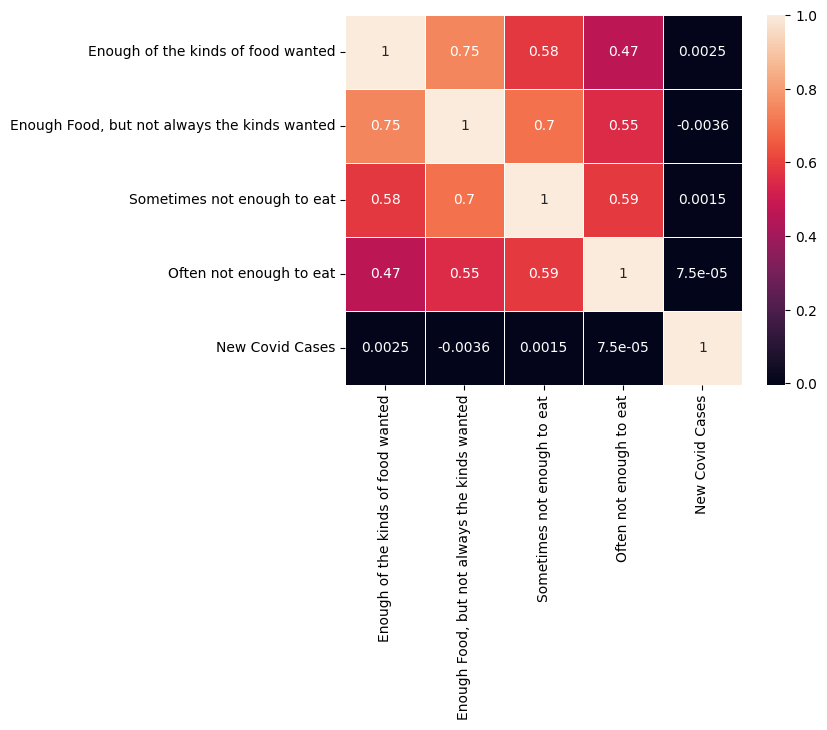

In [57]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation,linewidth=0.5,annot = True)
plt.show()